# Open Street Map

**Inhalt:** Daten aus einer Open Source Quelle ziehen

**Nötige Skills**
- Geopandatenhandling

**Lernziele**
- Einblick in Funktionsweise von OSM
- Vor-Aufbereitete OSM-Shapefiles laden
- Daten herunterladen mit `OSMnx`-Library

In [1]:
from IPython.display import Image

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
from shapely.geometry import Point, LineString, Polygon

In [4]:
import networkx as nx
import osmnx as ox

In [5]:
pd.set_option("display.max_rows", 300)

## Über Open Street Map

«OpenStreetMap is a map of the world, created by people like you and free to use under an open license.»

https://www.openstreetmap.org

=> Es ist das Google-Street-Map-Äquivalent der Open-Source-Community.

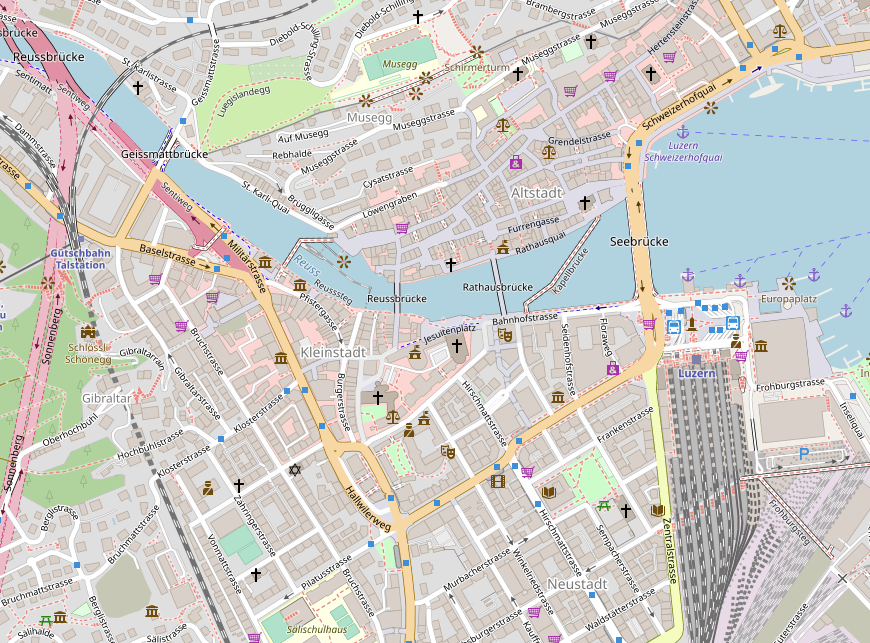

In [6]:
Image("dataprojects/osm/osm-luzern.png")

About:
- https://de.wikipedia.org/wiki/OpenStreetMap
- https://wiki.openstreetmap.org/wiki/Main_Page

Man kann auf verschiedenen Wegen Daten aus OSM laden. Hier eine Übersicht: https://learnosm.org/de/osm-data/getting-data/

## 1. via API

Für Softwareentwickler und professionelle Anwender gibt es die OSM API:
- Overpass API https://wiki.openstreetmap.org/wiki/Overpass_API

Diese ist recht kompliziert, es gibt spezielles Tool, das einem hilft, den Querystring aufzubauen
- Overpass Turbo: http://overpass-turbo.eu/

Wie man diese Tools in Python benutzen kann, liest man zB hier:
- https://towardsdatascience.com/loading-data-from-openstreetmap-with-python-and-the-overpass-api-513882a27fd0

Wir schauen uns stattdessen zwei andere Wege an

## 2. via Geofabrik

Hier werden vor-aufbereitete Shapefiles aus OWM zum Download angeboten: http://download.geofabrik.de/

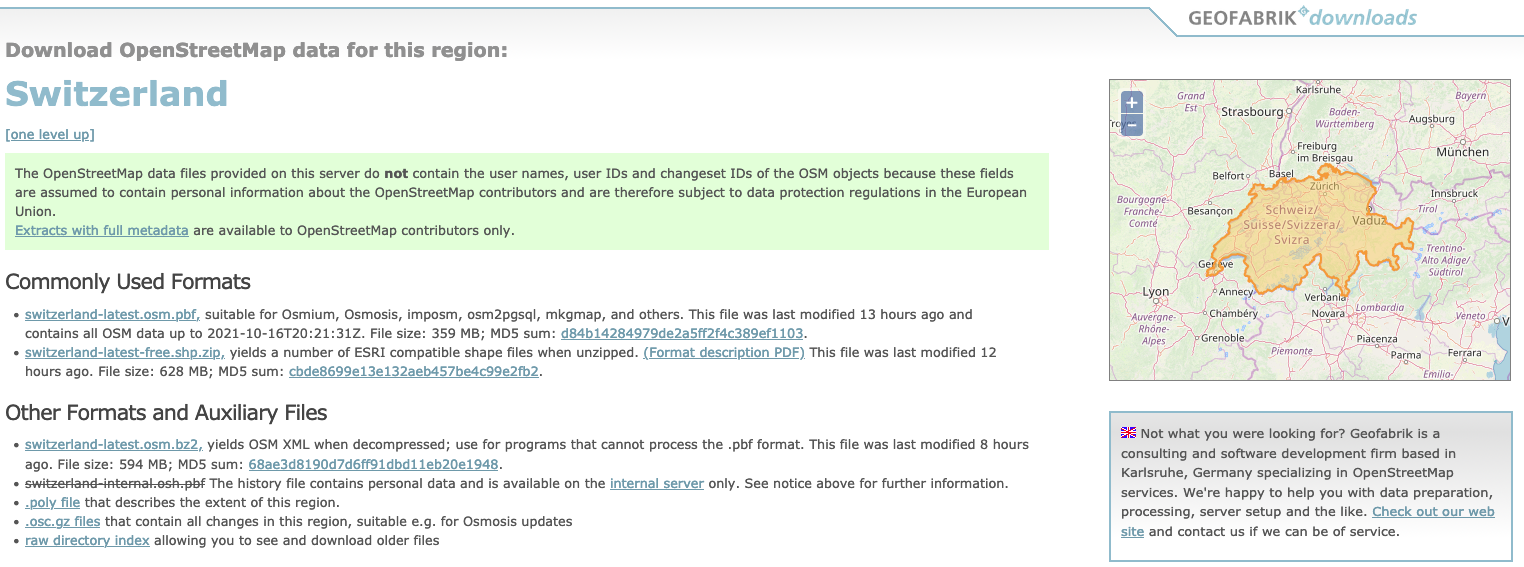

In [7]:
Image("dataprojects/osm/geofabrik.png")

Typischerweise werden dabei alle Informationen zu einem Land in ein grosses zip-Archiv gepackt (das Schweiz-File wiegt zB 628 MB!)

### Daten laden

Um die neueste Version zu erhalten: **folgendes Zip-File runterladen**:

`http://download.geofabrik.de/europe/switzerland-latest-free.shp.zip`

im ZIP hat es dann einzelne Shapefiles zu verschiedenen Objektkategorien:

- `gis_osm_buildings_a_free_1.shp`
- `gis_osm_landuse_a_free_1.shp`
- `gis_osm_natural_a_free_1.shp`
- `gis_osm_natural_free_1.shp`
- `gis_osm_places_a_free_1.shp`
- `gis_osm_places_free_1.shp`
- `gis_osm_pofw_a_free_1.shp`
- `gis_osm_pofw_free_1.shp`
- `gis_osm_pois_a_free_1.shp`
- `gis_osm_pois_free_1.shp`
- `gis_osm_railways_free_1.shp`
- `gis_osm_roads_free_1.shp`
- `gis_osm_traffic_a_free_1.shp`
- `gis_osm_traffic_free_1.shp`
- `gis_osm_transport_a_free_1.shp`
- `gis_osm_transport_free_1.shp`
- `gis_osm_water_a_free_1.shp`
- `gis_osm_waterways_free_1.shp`

Hier haben wir das Schweiz-Archiv bereits lokal entpackt.

*Achtung:*
- lange Ladezeit...
- `encoding="utf-8"` beachten

In [63]:
gdf_osm = gpd.read_file("dataprojects/osm/switzerland-latest-free.shp/gis_osm_buildings_a_free_1.shp", encoding="utf-8")

Kein Wunder dauert es lange, das Datenfile mit allen Gebäuden der Schweiz hat fast 2,5 Millionen Zeilen.

In [64]:
gdf_osm.shape

(2497125, 6)

Der Vorteil an den Geofabrik-Daten: Sie sind sehr schön strukturiert:

In [65]:
gdf_osm.head()

osm_id  code    fclass                       name            type  \
0  4087332  1500  building                       None          retail   
1  4418729  1500  building  Kulturzentrum Obere Mühle            None   
2  4418785  1500  building        Stadthaus Dübendorf            None   
3  4592724  1500  building                       None            None   
4  4684660  1500  building             Airside Center  transportation   

                                            geometry  
0  POLYGON ((9.37084 47.42151, 9.37130 47.42168, ...  
1  POLYGON ((8.62381 47.39540, 8.62395 47.39545, ...  
2  POLYGON ((8.61787 47.39688, 8.61804 47.39703, ...  
3  POLYGON ((8.52785 47.37481, 8.52791 47.37484, ...  
4  POLYGON ((8.56039 47.45128, 8.56040 47.45138, ...

### Datenstruktur

#### ID

Jedes Element in diesem Geodataframe hat eine `osm_id`. Diese ID ist der Unique Identifier einer bestimmten Einheit in OSM. Wir treffen sie auch an, wenn wir auf anderem Wege Daten herunterladen oder direkt auf OSM danach suchen.

Zum Beispiel das KKL Luzern: https://www.openstreetmap.org/relation/1661451

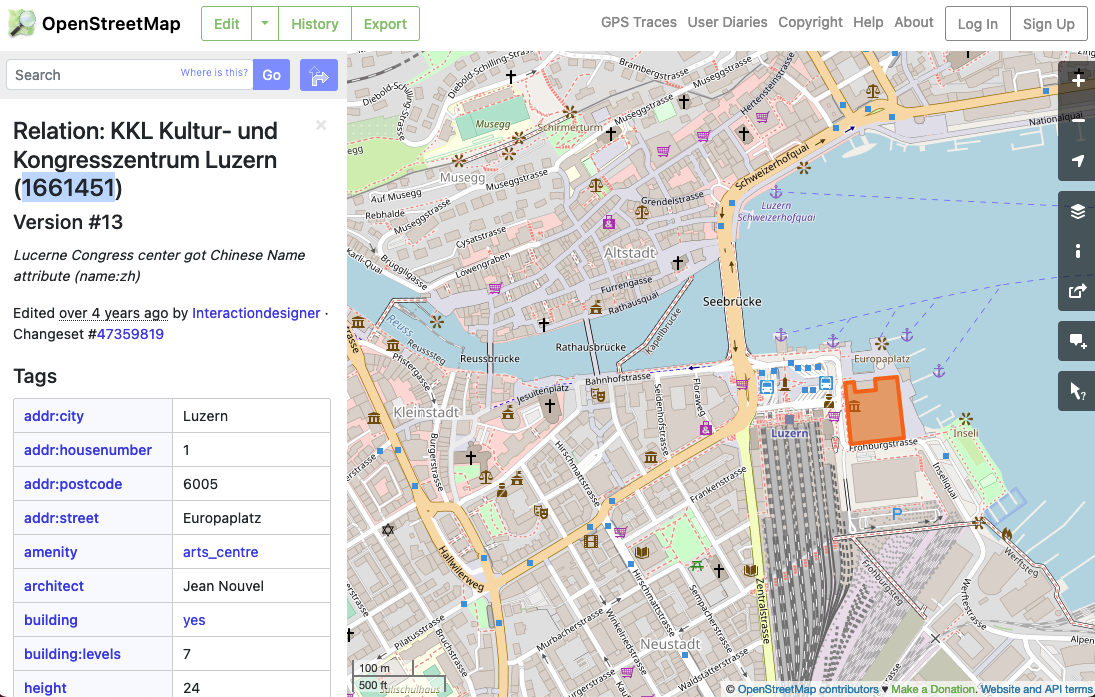

In [8]:
Image("dataprojects/osm/kkl.png")

In [67]:
gdf_osm[gdf_osm['osm_id'] == '1661451']

osm_id  code    fclass                                    name  \
1782465  1661451  1500  building  KKL Kultur- und Kongresszentrum Luzern   

         type                                           geometry  
1782465  None  POLYGON ((8.31147 47.05077, 8.31168 47.05079, ...

#### name

Zu jedem Element, das eine `osm_id` hat, gehört netterweise auch ein `name`.

#### code 

Ein vierstelliger Code, der angibt, um was für eine Art von Feature es sich handelt (Strasse, Fluss, Stadt, Point of Interest, Schule, Spital, ...)

Die ganze Liste der Codes findet sich hier: http://download.geofabrik.de/osm-data-in-gis-formats-free.pdf

In [68]:
gdf_osm['code'].value_counts()

1500    2497125
Name: code, dtype: int64

#### fclass

Beschreibt den Code in Worten. Weil wir in diesem Shapefile nur Gebäude geladen haben, lautet er immer `building`.

In [69]:
gdf_osm['fclass'].value_counts()

building    2497125
Name: fclass, dtype: int64

#### geometry

Die wichtigste Spalte: Enthält die geografischen Infos zu einem Feature, also zu einem Element der Karte. Das kann sein:
- ein `Point` 
- ein `Linestring` (z.B. bei einer Strasse)
- ein `Polygon` (zB bei einem Gebäude)

Wir können die Geometriespalte nutzen, um zB einen Kartenausschnitt («bbox») für Luzern zu generieren.

Dazu definieren wir zuerst ein Viereck mit den Eckpunkten: https://tools.retorte.ch/map/?swissgrid=2667889,1209686&zoom=14

In [70]:
north, south, east, west = 47.06954, 47.03474, 8.2715, 8.33184

Luzern = Polygon([[west, north], [east, north], [east, south], [west, south]])

In [71]:
Luzern.wkt

'POLYGON ((8.33184 47.06954, 8.2715 47.06954, 8.2715 47.03474, 8.33184 47.03474, 8.33184 47.06954))'

Anschliessend können wir das Geodataframe filtern (das Vergleichskennwort heisst hier `within`)

In [72]:
gdf_luzern = gdf_osm[gdf_osm.within(Luzern)]

In [73]:
gdf_luzern.head()

osm_id  code    fclass               name  type  \
10270  30155185  1500  building               None  None   
10272  30174428  1500  building               None  None   
11502  30596350  1500  building               None  None   
16226  32211225  1500  building               None  None   
23036  34047523  1500  building  Parkhaus Altstadt  None   

                                                geometry  
10270  POLYGON ((8.30088 47.04022, 8.30096 47.04030, ...  
10272  POLYGON ((8.31846 47.04660, 8.31850 47.04664, ...  
11502  POLYGON ((8.30689 47.04835, 8.30703 47.04840, ...  
16226  POLYGON ((8.27186 47.03639, 8.27209 47.03644, ...  
23036  POLYGON ((8.29881 47.05191, 8.29889 47.05219, ...

In [74]:
gdf_luzern.shape

(7723, 6)

#### type

Diese Spalte gibt bestimmte Details zum Gebäude an. Ist allerdings nicht sehr zuverlässig, wie zB diese Suche zeigt: In Luzern haben nur drei Gebäude den Typ «university».

In [75]:
gdf_luzern['type'].value_counts()

apartments            1334
detached                95
terrace                 66
residential             54
office                  53
retail                  47
roof                    45
school                  35
industrial              30
house                   30
garage                  23
church                  18
hotel                   15
shed                    13
garages                 12
commercial              11
construction            11
greenhouse              11
transportation           9
semidetached_house       6
chapel                   5
service                  5
hospital                 5
government               4
farm                     3
toilets                  3
university               3
hut                      3
public                   3
boathouse                3
kindergarten             2
transformer_tower        2
college                  2
train_station            2
sports_centre            2
synagogue                1
civic                    1
c

In [76]:
gdf_luzern[gdf_luzern['type'] == 'university']

osm_id  code    fclass                            name        type  \
240750  86380255  1500  building                            None  university   
242245  87220910  1500  building  Hochschule Luzern Musik - Jazz  university   
311837  99861176  1500  building                            None  university   

                                                 geometry  
240750  POLYGON ((8.30415 47.04751, 8.30429 47.04753, ...  
242245  POLYGON ((8.30560 47.05328, 8.30579 47.05339, ...  
311837  POLYGON ((8.30933 47.06364, 8.30953 47.06394, ...

Nichtsdestotrotz können wir dieses Attribut zB nutzen, um gewisse Gebäude beim Plotten farblich hervorzuheben.

Text(0.5, 1.0, 'Kirchen in Luzern')

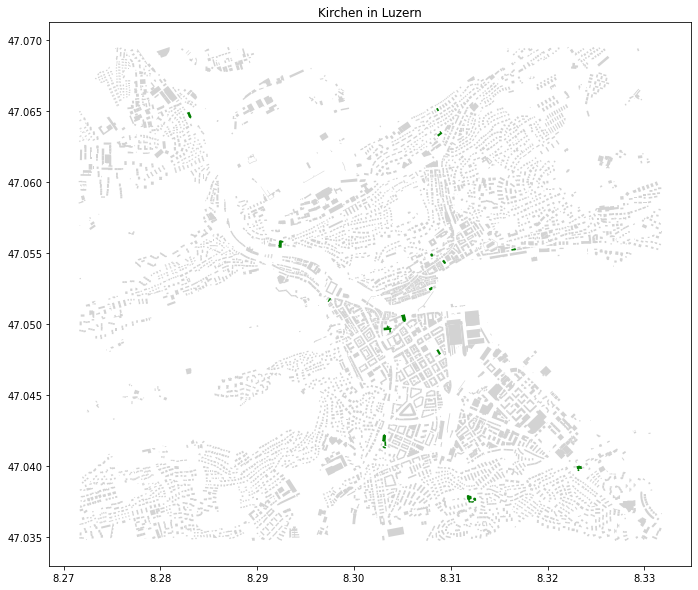

In [77]:
# Alle Gebäude
ax = gdf_luzern.plot(figsize=(15,10), color='lightgrey')

# Kirchen
gdf_luzern[gdf_luzern['type'] == "church"].plot(color='green', ax=ax)

ax.set_title("Kirchen in Luzern")

## 3. via OSMnx

OSMnx ist eine alternative Möglichkeit, um Daten aus der Open Street Map zu laden.

Es ist eine Python-Bibliothek, die anhand von selektiven Angaben
- die ein Suchquery bei der Overpass-API generiert und
- die Resultate zur praktischen Weiterverarbeitung aufbereitet

OSMnx-Dokumentation: https://osmnx.readthedocs.io/en/stable/

Beispiel-Notebooks zur Anwendung: https://github.com/gboeing/osmnx-examples/tree/main/notebooks

Hier lernen wir einige Möglichkeiten kennen, welche diese Library bietet.

## Datenabfrage: Boundaries

OSMnx kann anhand eines einfachen Suchstrings die OSM durchsuchen und liefert uns so z.B. die Umrisse eines bestimmten geografischen Gebiets.

Die Funktion dafür heisst `geocode_to_gdf()`:

In [6]:
gdf = ox.geocode_to_gdf("Aargau, Switzerland")

Wir erhalten ein Geodataframe mit einer einzigen Zeile.

In [7]:
gdf

geometry  bbox_north  bbox_south  \
0  MULTIPOLYGON (((7.71347 47.53978, 7.71357 47.5...   47.621112    47.13748   

   bbox_east  bbox_west   place_id  osm_type   osm_id        lat       lon  \
0     8.4551   7.713469  258697892  relation  1686359  47.412396  8.194832   

          display_name     class            type  importance  
0  Aargau, Switzerland  boundary  administrative    0.795936

Diese Zeile entspricht einer geografischen Einheit auf Open Street Map.

Wir erkennen das zB wenn wir auf OSM nach der `osm_id` suchen: https://www.openstreetmap.org/relation/1686359

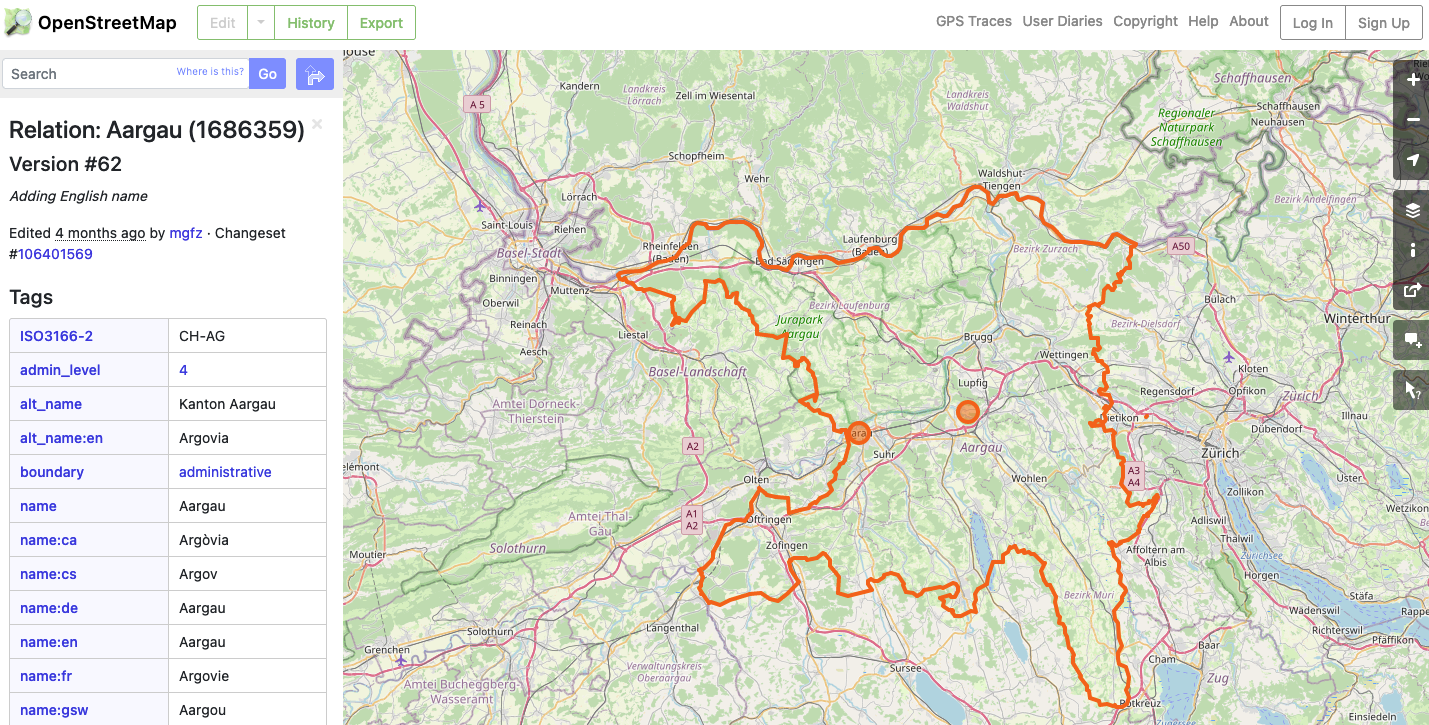

In [8]:
Image("dataprojects/osm/ag.png")

Mit unserem Geodataframe können wir nun alles machen, was wir wollen. zB plotten:

<AxesSubplot:>

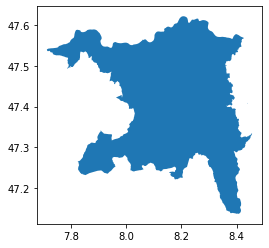

In [9]:
gdf.plot()

#### Mehrere Gebiete abfragen

Mit einer Liste von Suchstrings können wir ein Geodatenframe erstellen, das mehrere Einträge enthält.

In [10]:
places = [
    "Kreis 1, Zürich, Switzerland",
    "Kreis 2, Zürich, Switzerland",
    "Kreis 3, Zürich, Switzerland",
    "Kreis 4, Zürich, Switzerland",
    "Kreis 5, Zürich, Switzerland",
    "Kreis 6, Zürich, Switzerland",
    "Kreis 7, Zürich, Switzerland",
    "Kreis 8, Zürich, Switzerland",
    "Kreis 9, Zürich, Switzerland",
    "Kreis 10, Zürich, Switzerland",
    "Kreis 11, Zürich, Switzerland",
    "Kreis 12, Zürich, Switzerland"
]
gdf = ox.geocode_to_gdf(places)

<AxesSubplot:>

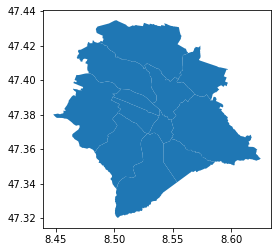

In [11]:
gdf.plot()

#### Präzise Suche

Manche Suchstrings können missverständlich sein. ZB «Zürich, Switzerland»: Ist hier die Stadt oder der Kanton gemeint? Um Missverständnisse auszuschliessen, können wir unsere Spezifikation in einem Dictionary präzisieren:

In [12]:
gdf = ox.geocode_to_gdf(
    {
        "state": "Zürich",
        "country": "Switzerland"
    }
)

<AxesSubplot:>

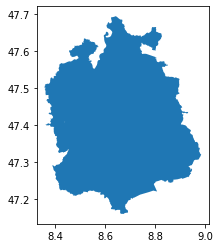

In [13]:
gdf.plot()

#### Koordinatensystem

Wichtig: Sobald wir mit diesen Daten kartografisch irgendwas sinnvolles machen wollen, sollten wir sie in ein passendes Koordinatensystem umprojizieren.

In [14]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [15]:
gdf = gdf.to_crs(epsg=21781)

<AxesSubplot:>

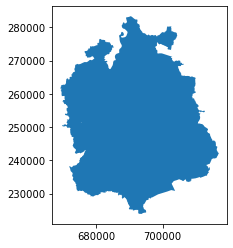

In [16]:
gdf.plot()

## Datenabfrage: Netzwerke

Um ein Strassennetzwerk aus OSM zu laden, machen wir zwei Schritte statt nur einen.

#### 1. Graph erstellen

OSMnx lädt die Daten zuerst in einen sogenannten Graph (des Typs `networkx`). Die Funktion dazu heisst `graph_from_place():`:

In [17]:
G = ox.graph_from_place("Luzern, Switzerland", network_type="drive")

Diesen Graph können wir mix OSMnx auch bereits direkt plotten:

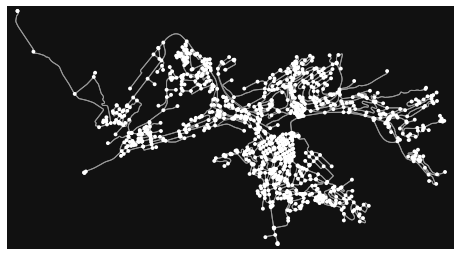

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [18]:
ox.plot_graph(G)

Um in Geopandas damit zu arbeiten, müssen wir den Graph konvertieren mit `graph_to_gdfs()`:

In [19]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

Wir erhalten zwei Geodataframes, eines mit den Punkten (nodes) und eines mit den Linien (edges):

In [20]:
gdf_nodes.head()

y         x  ref            highway  street_count  \
osmid                                                                 
14834624  47.063588  8.286472   25  motorway_junction             3   
27329352  47.051324  8.298805  NaN                NaN             3   
27329372  47.049344  8.300733  NaN                NaN             4   
27329404  47.047037  8.297216  NaN                NaN             3   
27329411  47.045972  8.297853  NaN                NaN             3   

                          geometry  
osmid                               
14834624  POINT (8.28647 47.06359)  
27329352  POINT (8.29880 47.05132)  
27329372  POINT (8.30073 47.04934)  
27329404  POINT (8.29722 47.04704)  
27329411  POINT (8.29785 47.04597)

In [21]:
gdf_edges.head()

osmid  oneway            name        highway  \
u        v         key                                                     
14834624 472850194 0     39480307    True       Emmen Süd  motorway_link   
27329352 27564602  0      4496447   False    Bruchstrasse    residential   
         311286655 0     28342745   False    Bruchstrasse    residential   
         27329372  0    110711765   False    Bruchstrasse    residential   
27329372 311286650 0      4496451   False  Klosterstrasse    residential   

                       access   length  \
u        v         key                   
14834624 472850194 0       no  278.142   
27329352 27564602  0      NaN   52.244   
         311286655 0      NaN   55.732   
         27329372  0      NaN  264.870   
27329372 311286650 0      NaN   40.137   

                                                                 geometry  \
u        v         key                                                      
14834624 472850194 0    LINESTRING (8.28647 47.06359, 8.28651 47.06403...   
27329352 27564602  0    LINESTRING (8.29880 47.05132, 8.29899 47.05168...   
         311286655 0    LINESTRING (8.29880 47.05132, 8.29879 47.05129...   
         27329372  0    LINESTRING (8.29880 47.05132, 8.29886 47.05130...   
27329372 311286650 0    LINESTRING (8.30073 47.04934, 8.30060 47.04929...   

                       maxspeed bridge lanes  ref width junction tunnel  \
u        v         key                                                    
14834624 472850194 0        NaN    NaN   NaN  NaN   NaN      NaN    NaN   
27329352 27564602  0         30    NaN   NaN  NaN   NaN      NaN    NaN   
         311286655 0         30    NaN   NaN  NaN   NaN      NaN    NaN   
         27329372  0         30    NaN   NaN  NaN   NaN      NaN    NaN   
27329372 311286650 0         30    NaN   NaN  NaN   NaN      NaN    NaN   

                       service  
u        v         key          
14834624 472850194 0       NaN  
27329352 27564602  0       NaN  
         311286655 0       NaN  
         27329372  0       NaN  
27329372 311286650 0       NaN

### BBox statt Suchstring

Statt mit einem Suchstring («Luzern, Switzerland») können wir die Datensuche auch mit einer bounding box eingrenzen:

In [22]:
north, south, east, west = 47.06954, 47.03474, 8.2715, 8.33184

Die Funktion heisst dann leicht anders: `graph_from_bbox()`

In [23]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")

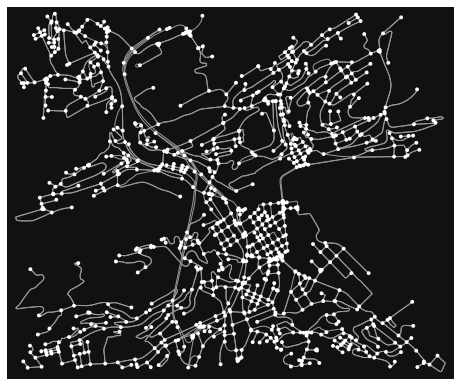

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [24]:
ox.plot_graph(G)

### Metainformationen

In der Open Street Map hat es nebst den reinen Geoinformationen – so genannte «nodes» (Punkte), «ways» (Linien) und «relations» (zusammengefasste nodes und ways) – auch eine Menge Metainformationen. Diese kann man mit OSMnx abfragen.

#### Netzwerktypen

Statt nach `network="drive"` (fahrbare Strassen) können wir zum Beispiel auch nach anderen Strassennetzen suchen:

- `drive` - get drivable public streets (but not service roads)
- `drive_service` - get drivable streets, including service roads
- `walk - get all` streets and paths that pedestrians can use (this network type ignores one-way directionality)
- `bike - get all` streets and paths that cyclists can use
- `all - download` all non-private OSM streets and paths
- `all_private` - download all OSM streets and paths, including private-access ones


#### Filter

Und wir können die Suche mit so genannten Filtern weiter eingrenzen. ZB nur auf Autobahnen, mit `custom_filter=`:

In [25]:
G = ox.graph_from_place("Aargau, Switzerland", network_type="drive", custom_filter='["highway"~"motorway"]')

In [26]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges = gdf_edges.to_crs(epsg=21781)

Wir können die aargauer Autobahnen plotten, zB indem wir zusätzlich noch die Umrisse des Kantons holen:

In [27]:
gdf_ag = ox.geocode_to_gdf("Aargau, Switzerland")
gdf_ag = gdf_ag.to_crs(epsg=21781)

<AxesSubplot:title={'center':'Autobahnen im AG'}>

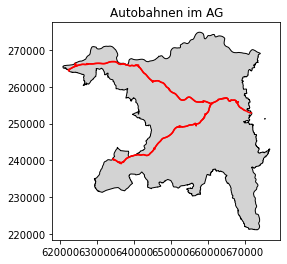

In [28]:
ax = gdf_ag.plot(color="lightgrey", linewidth=1, edgecolor='black')
ax.set_title("Autobahnen im AG")
gdf_edges.plot(color='red', ax=ax)

Wie kommt man auf diese Filterwörter? Die Antwort lautet: Es sind so genannte Tags, die in OSM hinterlegt sind.

#### Tags

Schauen wir uns zunächst unser Suchergebnis zu den Autobahnen nochmals an.

Unser Filter hiess: '["highway"~"motorway"]'

Im Geodataframe finden wir diese Begriffe wieder:
- Es gibt eine Spalte namens «highway»
- Die Einträge darin heissen «motorway» oder ähnlich.

In [29]:
gdf_edges.head()

osmid  \
u      v          key                                                      
453457 7004603864 0             [60610909, 4803547, 60610916, 298817541]   
       292555940  0                       [827816284, 49207821, 4988494]   
453494 206334493  0                       [61888608, 19799953, 62191868]   
       453499     0                                             90122998   
453499 453543     0    [279622085, 64226502, 64226503, 26324047, 4310...   

                       oneway   lanes ref   name        highway  \
u      v          key                                             
453457 7004603864 0      True  [3, 1]  16  Eiken  motorway_link   
       292555940  0      True       2  A3    NaN       motorway   
453494 206334493  0      True       1  17  Frick  motorway_link   
       453499     0      True       2  A3    NaN       motorway   
453499 453543     0      True       2  A3    NaN       motorway   

                            maxspeed    length  \
u      v          key                            
453457 7004603864 0    [120, 80, 60]   980.731   
       292555940  0              120  1331.795   
453494 206334493  0    [40, 120, 60]   404.210   
       453499     0              120   809.435   
453499 453543     0       [120, 100]  5193.819   

                                                                geometry  \
u      v          key                                                      
453457 7004603864 0    LINESTRING (640284.510 265750.452, 640328.488 ...   
       292555940  0    LINESTRING (640284.510 265750.452, 640393.609 ...   
453494 206334493  0    LINESTRING (644776.647 261676.986, 644795.942 ...   
       453499     0    LINESTRING (644776.647 261676.986, 644851.464 ...   
453499 453543     0    LINESTRING (645539.369 261500.467, 645764.488 ...   

                      bridge tunnel  
u      v          key                
453457 7004603864 0      NaN    NaN  
       292555940  0      yes    NaN  
453494 206334493  0      NaN    NaN  
       453499     0      NaN    NaN  
453499 453543     0      yes    NaN

Wo diese Metainformation herkommt, erkennen wir auf der Online-Version von OSM, wenn wir eines der Features aus unserem Geodataframe dort abrufen: https://www.openstreetmap.org/way/827816284

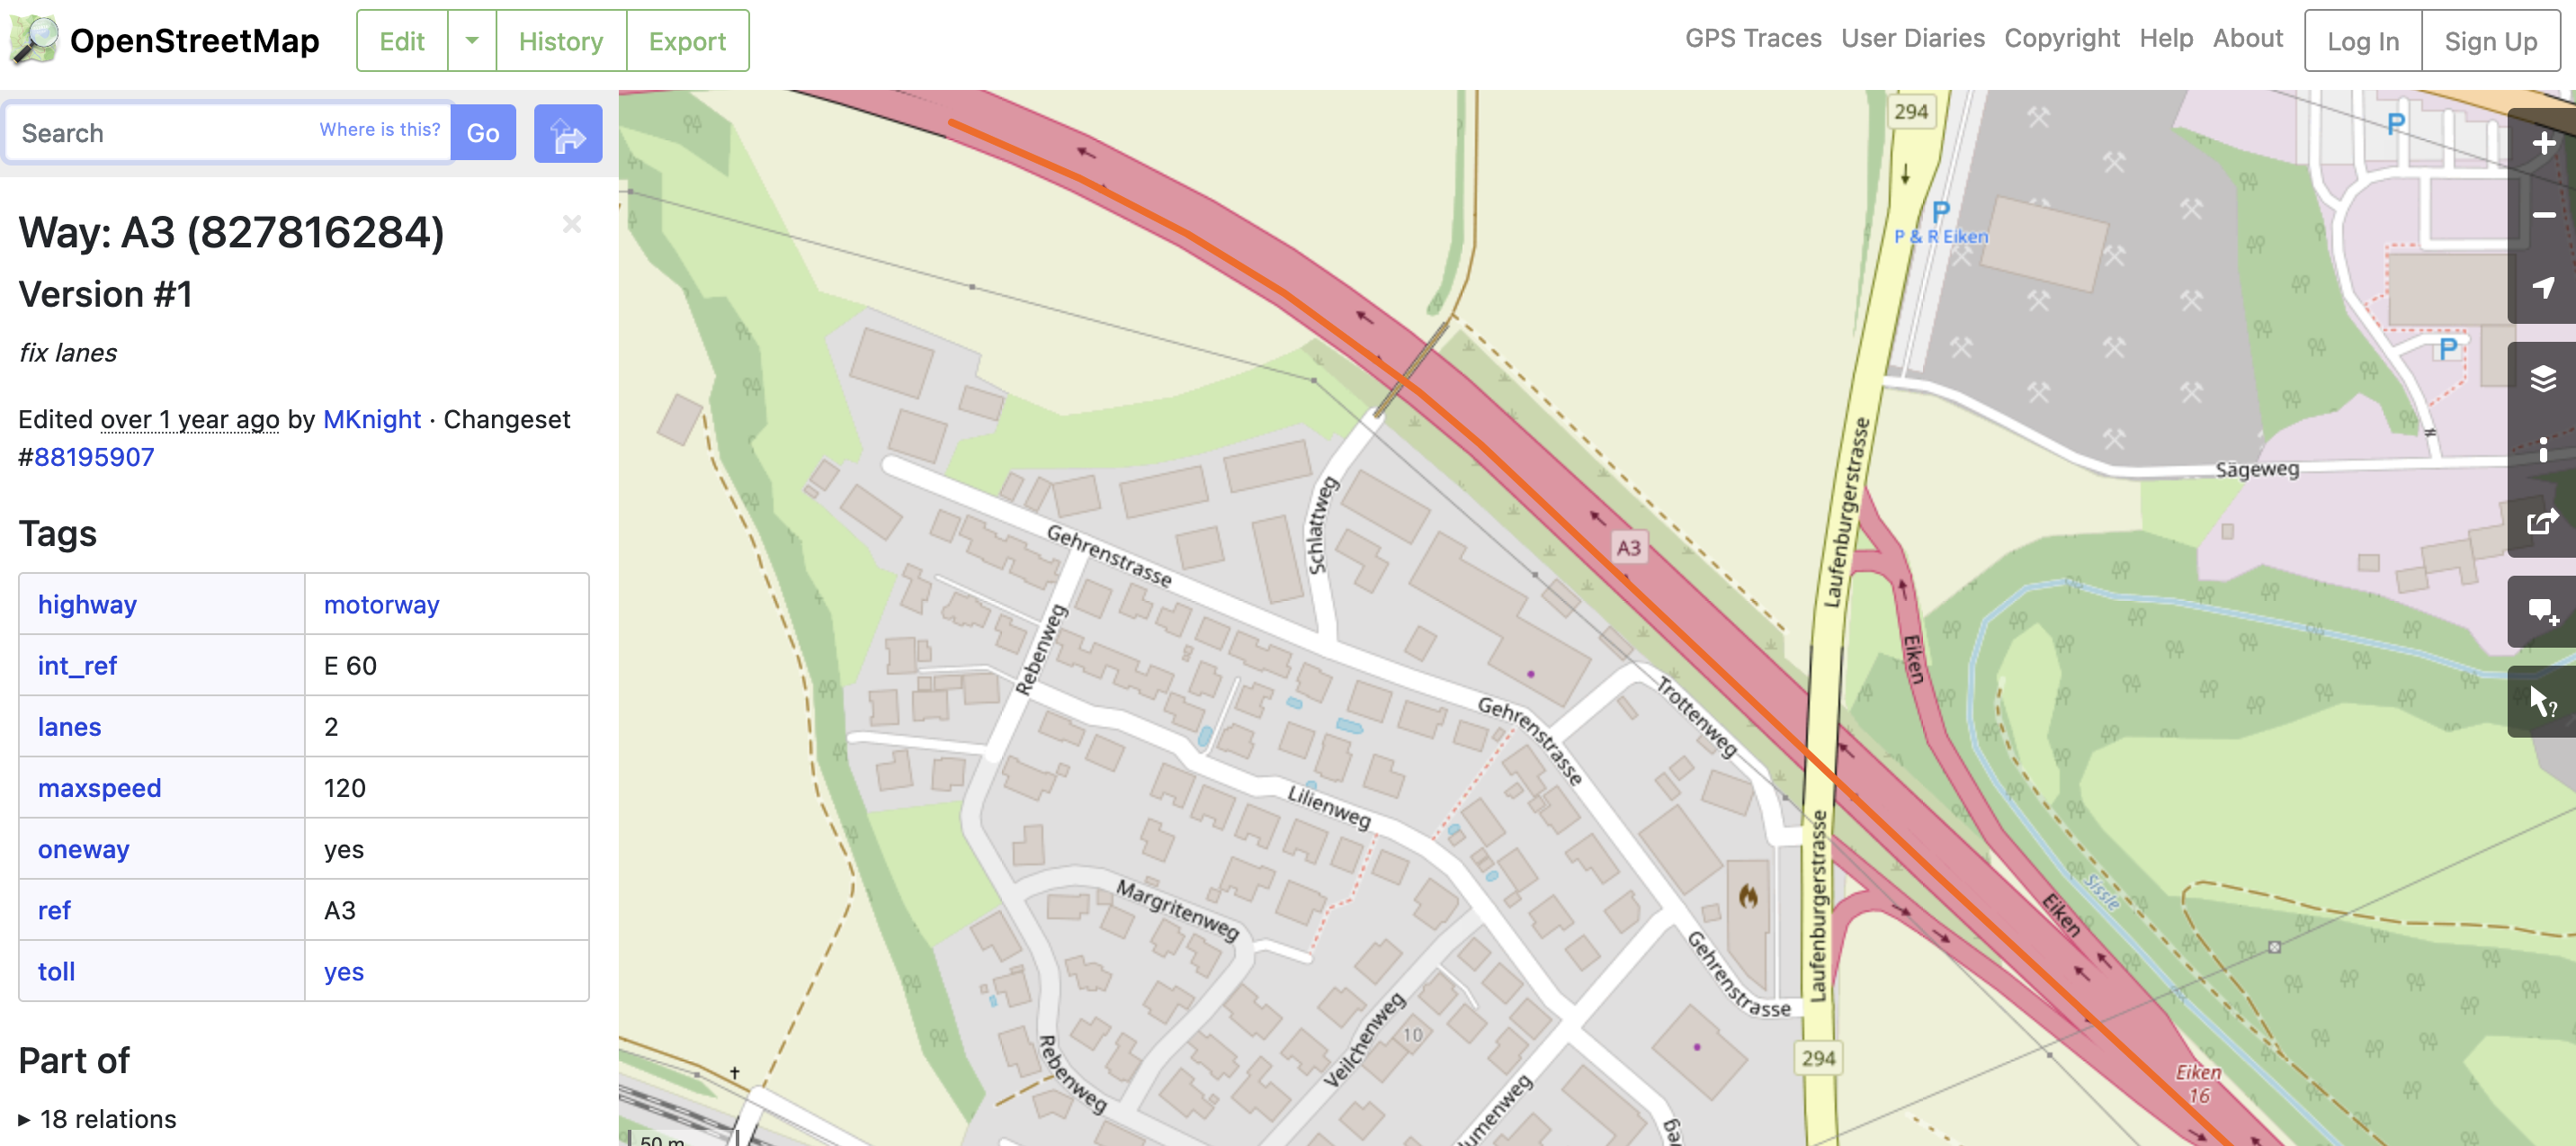

In [30]:
Image("dataprojects/osm/a3.png")

Das betreffende Geoelement wurde auf OSM als «highway» getagged und hat, mit der Unterkategorie «motorway».

Das OSM-Wiki verrät uns, was es alles für Typen von highways gibt: https://wiki.openstreetmap.org/wiki/Key:highway?uselang=en

Und auch sämtliche anderen Metainformationen zu diesem Autobahnteilstück («lanes», «oneway», «maxspeed») finden wir in unserem Geodataframe wieder.

#### Andere Netzwerke

Welche anderen Tags können wir nutzen, um nach bestimmten Geofeatures zu suchen?

Auf dem OSM-Wiki gibt es dazu eine ellenlange Liste: https://wiki.openstreetmap.org/wiki/Map_features

- `"aerialway"`: Seilbahnen
- `"amenity"`: Jegliche Art von Objekt mit einer speziellen Funktion: `~"bar"`, `~"library"`, `~"charging_station"`, etc.
- `"boundary"`: eine Umgrenzung. In Kombination nutzbar mit `"admin_level"`
- `"building"`: ein Gebäude. zB `~"mosque"`, `~"train_station"`, `~"parking"`, `~"stadium"`, etc.
- `"landuse"`: Wie ein bestimmtes Landstück genutzt wird, zB `~"farmland"`
- `"natural"`: Elemente der Natur, zB `~"glacier"`, `~"beach"`, etc.
- etc.

So können wir zB statt nach Strassen nach Eisenbahnen suchen:

In [31]:
G = ox.graph_from_place("Aargau, Switzerland", custom_filter='["railway"~"rail"]')

<AxesSubplot:title={'center':'Eisenbahnen im AG'}>

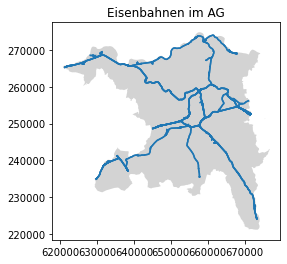

In [32]:
ax = gdf_ag.plot(color="lightgrey")
ax.set_title("Eisenbahnen im AG")

gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_edges.to_crs(21781).plot(ax=ax)

## Datenabfrage: Geometrien

Bis jetzt haben wir (Strassen-)netzwerke abgefragt. Mithilfe der auf OSM hinterlegten Tags können wir aber auch sämtliche Geo-Elemente jeglicher herunterladen, die in einem bestimmten Gebiet vorhanden sind.

### Gebäude

Dazu gibt es die Funktion `geometries_from_place()`. Sie benötigt:
- eine geografische Eingrenzung der Suche ("place")
- eine (Reihe von) Tags, nach denen gesucht werden soll.

In [33]:
place = "Wettingen, Switzerland"
tags = {"building": True}
gdf_bldg = ox.geometries_from_place(place, tags)

In Wettingen sind zB über 3000 Gebäude erfasst:

In [34]:
gdf_bldg.shape

(3131, 72)

Da es ziemlich viele Tags gibt, die sonst noch mit diesen Gebäuden verknüpft sind, erhalten wir ein ziemlich breites GDF:

In [35]:
gdf_bldg.columns

Index(['geometry', 'amenity', 'name', 'addr:city', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'addr:country', 'operator', 'level',
       'wheelchair', 'building', 'nodes', 'denomination', 'religion',
       'wikidata', 'building:levels', 'sport', 'layer', 'brand', 'wikipedia',
       'frequency', 'generator:type', 'plant:method',
       'plant:output:electricity', 'plant:source', 'power', 'start_date',
       'voltage', 'website', 'addr:housename', 'note',
       'building:levels:underground', 'roof:levels', 'max_level', 'min_level',
       'shop', 'toilets', 'source', 'year_of_construction', 'roof:shape',
       'cash_withdrawal', 'cash_withdrawal:fee', 'cash_withdrawal:operator',
       'cash_withdrawal:purchase_required', 'cash_withdrawal:type',
       'opening_hours', 'payment:cash', 'payment:credit_cards',
       'service_times', 'cuisine', 'craft', 'microbrewery', 'phone',
       'building:use', 'email', 'repair', 'sale', 'leisure', 'capacity',
       'fixme', 't

In [36]:
gdf_bldg.head(5)

geometry  \
element_type osmid                                                           
node         3724352528                           POINT (8.35965 47.47358)   
way          43991579    POLYGON ((8.31796 47.46819, 8.31761 47.46787, ...   
             47026745    POLYGON ((8.31543 47.45724, 8.31551 47.45718, ...   
             47026746    POLYGON ((8.31576 47.45702, 8.31660 47.45645, ...   
             47026905    POLYGON ((8.31725 47.45600, 8.31689 47.45551, ...   

                                  amenity             name  addr:city  \
element_type osmid                                                      
node         3724352528               NaN     Muntel-Hütte        NaN   
way          43991579    place_of_worship         St.Anton  Wettingen   
             47026745                 NaN              NaN        NaN   
             47026746              school     KSWE Langbau        NaN   
             47026905              school  KSWE Ostschöpfe        NaN   

                        addr:housenumber addr:postcode addr:street  \
element_type osmid                                                   
node         3724352528              NaN           NaN         NaN   
way          43991579                NaN          5430         NaN   
             47026745                NaN           NaN         NaN   
             47026746                NaN           NaN         NaN   
             47026905                NaN           NaN         NaN   

                        addr:country operator level  ... nursery  \
element_type osmid                                   ...           
node         3724352528          NaN      NaN   NaN  ...     NaN   
way          43991579             CH      NaN   NaN  ...     NaN   
             47026745            NaN      NaN   NaN  ...     NaN   
             47026746            NaN      NaN   NaN  ...     NaN   
             47026905            NaN      NaN   NaN  ...     NaN   

                        operator:type after_school kindergarten orphanage  \
element_type osmid                                                          
node         3724352528           NaN          NaN          NaN       NaN   
way          43991579             NaN          NaN          NaN       NaN   
             47026745             NaN          NaN          NaN       NaN   
             47026746             NaN          NaN          NaN       NaN   
             47026905             NaN          NaN          NaN       NaN   

                        bicycle_parking height ways tourism type  
element_type osmid                                                
node         3724352528             NaN    NaN  NaN     NaN  NaN  
way          43991579               NaN    NaN  NaN     NaN  NaN  
             47026745               NaN    NaN  NaN     NaN  NaN  
             47026746               NaN    NaN  NaN     NaN  NaN  
             47026905               NaN    NaN  NaN     NaN  NaN  

[5 rows x 72 columns]

Wir sehen hier auch, dass das Geodatenframe drei übergeordnete Indizes hat.

Die ways (Pfade), relations (Sammlungen) und nodes (Punkte) sind separat aufgeführt.

In [37]:
gdf_bldg.index.get_level_values('element_type').value_counts()

way         3126
relation       4
node           1
Name: element_type, dtype: int64

Wir können uns aus diesem Multi-Index zB die Pfade heraussuchen.

In [38]:
gdf_bldg = gdf_bldg[gdf_bldg.index.get_level_values('element_type') == 'way']

In [39]:
gdf_bldg.head(2)

geometry  \
element_type osmid                                                         
way          43991579  POLYGON ((8.31796 47.46819, 8.31761 47.46787, ...   
             47026745  POLYGON ((8.31543 47.45724, 8.31551 47.45718, ...   

                                amenity      name  addr:city addr:housenumber  \
element_type osmid                                                              
way          43991579  place_of_worship  St.Anton  Wettingen              NaN   
             47026745               NaN       NaN        NaN              NaN   

                      addr:postcode addr:street addr:country operator level  \
element_type osmid                                                            
way          43991579          5430         NaN           CH      NaN   NaN   
             47026745           NaN         NaN          NaN      NaN   NaN   

                       ... nursery operator:type after_school kindergarten  \
element_type osmid     ...                                                   
way          43991579  ...     NaN           NaN          NaN          NaN   
             47026745  ...     NaN           NaN          NaN          NaN   

                      orphanage bicycle_parking height ways tourism type  
element_type osmid                                                        
way          43991579       NaN             NaN    NaN  NaN     NaN  NaN  
             47026745       NaN             NaN    NaN  NaN     NaN  NaN  

[2 rows x 72 columns]

Jedes Gebäude hat einen Pfad, das dessen Umriss angibt. Wir können so die Geäbude plotten:

<AxesSubplot:>

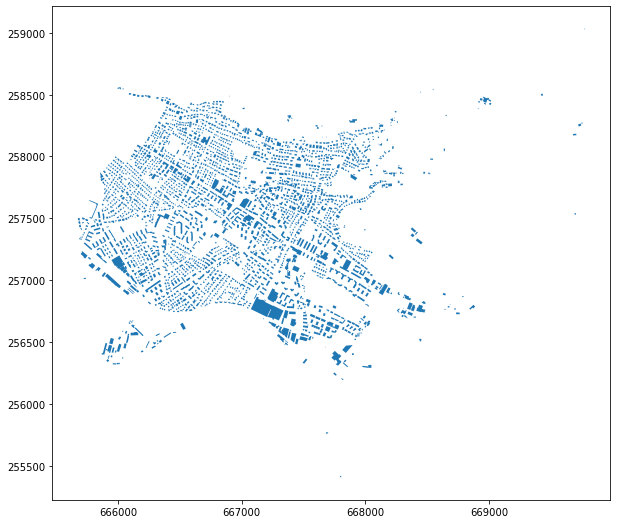

In [40]:
gdf_bldg = gdf_bldg.to_crs(epsg=21781)
gdf_bldg.plot(figsize=(10,10))

## Anwendungen

Nachfolgend ein paar Beispiele, was wir in Geopandas mit den Datenabfragen anstellen können.

### Plots von mehreren Datenabfragen

Wir haben das schon weiter oben gesehen. Mit `ax=...` können wir mehrere Plots übereinanderlegen:

<AxesSubplot:>

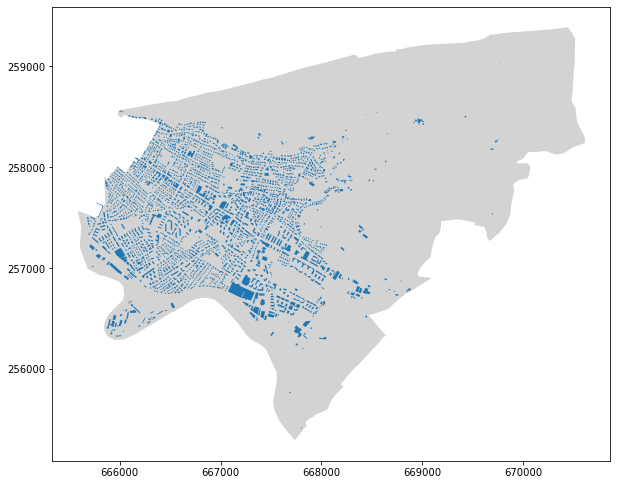

In [41]:
# Abfrage und Plot der Gemeindegrenze
gdf_we = ox.geocode_to_gdf("Wettingen, Switzerland").to_crs(epsg=21781)
ax = gdf_we.plot(color='lightgrey', figsize=(10, 10))

# Plot der Gebäude (auf "ax")
gdf_bldg.plot(figsize=(10,10), ax=ax)

### Abgefragte Daten filtern

Wie bereits erwähnt: Wir haben ein riesenbreites Geodataframe mit zig Metadaten.

In [42]:
gdf_bldg.head(2)

geometry  \
element_type osmid                                                         
way          43991579  POLYGON ((666293.845 257861.628, 666268.268 25...   
             47026745  POLYGON ((666116.868 256641.716, 666123.233 25...   

                                amenity      name  addr:city addr:housenumber  \
element_type osmid                                                              
way          43991579  place_of_worship  St.Anton  Wettingen              NaN   
             47026745               NaN       NaN        NaN              NaN   

                      addr:postcode addr:street addr:country operator level  \
element_type osmid                                                            
way          43991579          5430         NaN           CH      NaN   NaN   
             47026745           NaN         NaN          NaN      NaN   NaN   

                       ... nursery operator:type after_school kindergarten  \
element_type osmid     ...                                                   
way          43991579  ...     NaN           NaN          NaN          NaN   
             47026745  ...     NaN           NaN          NaN          NaN   

                      orphanage bicycle_parking height ways tourism type  
element_type osmid                                                        
way          43991579       NaN             NaN    NaN  NaN     NaN  NaN  
             47026745       NaN             NaN    NaN  NaN     NaN  NaN  

[2 rows x 72 columns]

 Wir können zB all die Gebäude heraussuchen, die gleichzeitig auch eine «amenity» eines bestimmten Typs sind.

In [43]:
gdf_schools = gdf_bldg[gdf_bldg['amenity'] == 'school']

Das Ergebnis als Plot:

<AxesSubplot:>

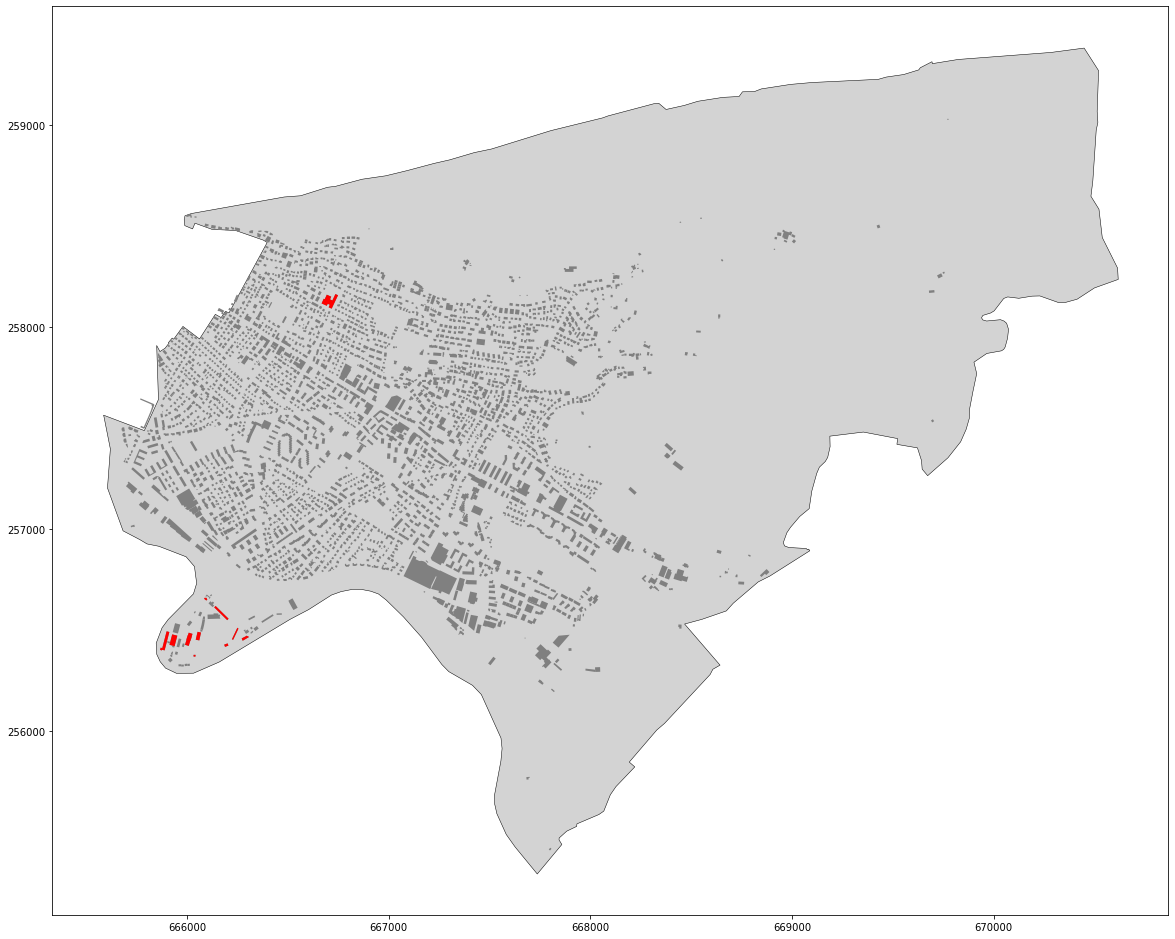

In [44]:
# Gemeindegrenze
ax = gdf_we.plot(linewidth=0.5, edgecolor='black', color='lightgrey', figsize=(20, 20))

# Alle Gebäude
gdf_bldg.plot(color='grey', ax=ax)

# Schulen
gdf_schools.plot(color='red', ax=ax)

Nun haben wir allerdings ein Problem: In Wettingen gibt es noch mehr Schulen als hier eingezeichnet sind.

### Daten ergänzen

Das Problem scheint zu sein: Einige der Schulen wurden zwar als "amenity": "school" kategorisiert, aber nicht als "building" :-/

Wir holen uns deshalb von der OSM nochmals alle Geometrien raus, die als "school" getaggt wurden (aber nicht zwangsläufig auch als Gebäude!

In [45]:
place = "Wettingen, Switzerland"
tags = {"amenity": "school"}
gdf_schools2 = ox.geometries_from_place(place, tags).to_crs(epsg=21781)

Ein Beispiel für einen solchen Eintrag ist das Schulhaus Altenburg:

In [46]:
gdf_schools2[gdf_schools2['name'] == "Altenburg"]

amenity       name  \
element_type osmid                          
way          117040111  school  Altenburg   

                                                                 geometry  \
element_type osmid                                                          
way          117040111  POLYGON ((666434.757 257549.868, 666429.769 25...   

                       addr:postcode name:de website addr:housenumber  \
element_type osmid                                                      
way          117040111           NaN     NaN     NaN              NaN   

                       addr:street  \
element_type osmid                   
way          117040111         NaN   

                                                                    nodes  \
element_type osmid                                                          
way          117040111  [1318504471, 1370777372, 1370777369, 137077737...   

                       building building:levels wheelchair ways type  
element_type osmid                                                    
way          117040111      NaN             NaN        yes  NaN  NaN

Es wurden also gewisse Areale als Schule getaggt, aber nicht die dortigen Gebäude.

Was das heisst, sieht man, wenn man die Areale zum obigen Plot hinzufügt.

<AxesSubplot:>

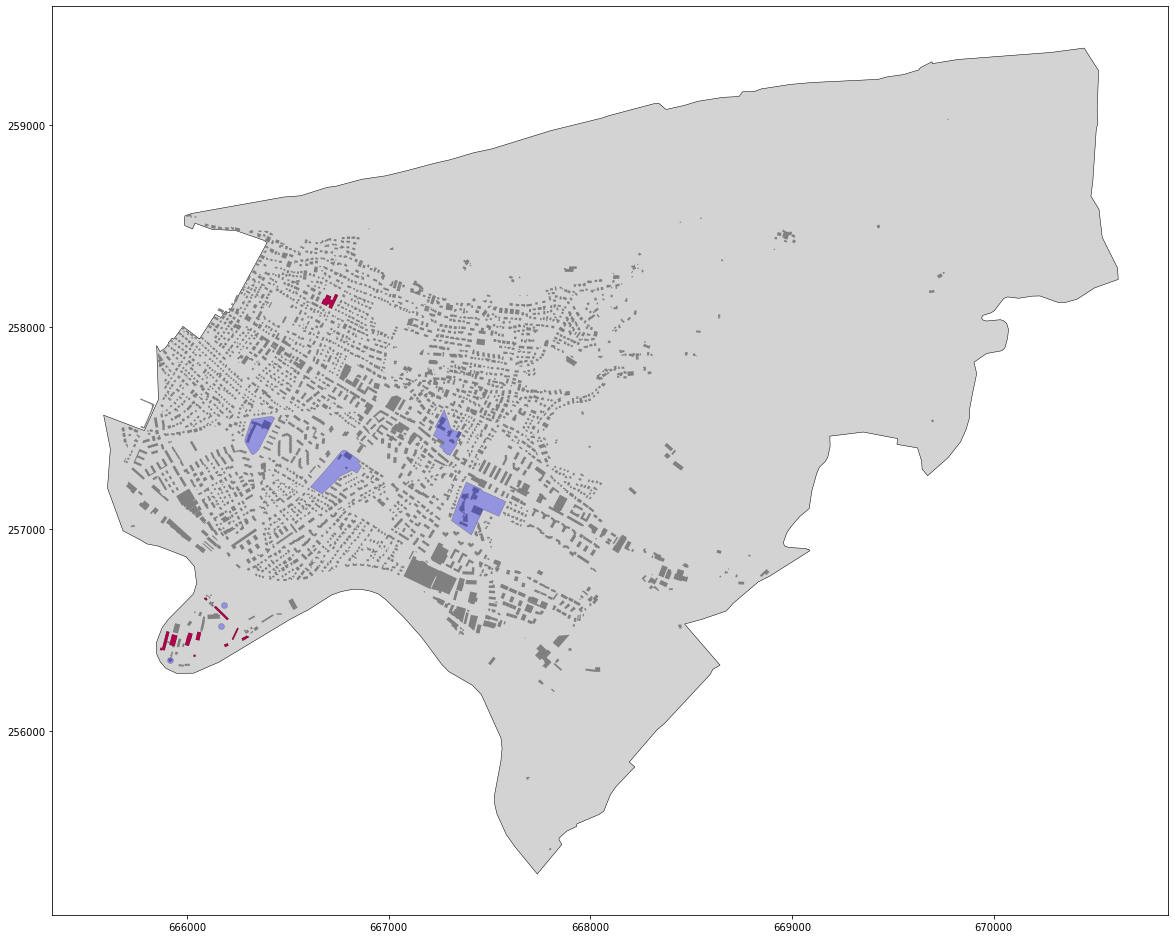

In [47]:
# Gemeindegrenze
ax = gdf_we.plot(linewidth=0.5, edgecolor='black', color='lightgrey', figsize=(20, 20))

# Alle Gebäude
gdf_bldg.plot(color='grey', ax=ax)

# Schulen => aus Gebäuden
gdf_schools.plot(color='red', ax=ax)

# Schulen => aus Amenities
gdf_schools2.plot(color='blue', linewidth=0.5, alpha=0.3, edgecolor='black', ax=ax)

#### Lösungsansatz:

Gebäude, die innerhalb der Schul-Areale liegen, umklassifizieren.

Dazu nutzen wir die Funktion `unary_union`, um alle Schul-Areale zu einer gemeinsamen Shape zusammenzufassen.

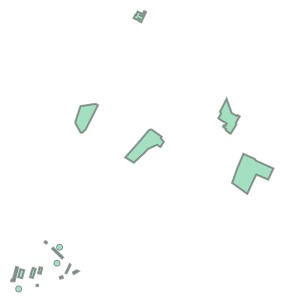

In [48]:
gdf_schools2.unary_union

Danach filtern wir die Gebäude in unserem `gdf_bldg` danach, ob sie innerhalb dieser Shape liegen.

Die passende Relation dazu heisst `within()`.

Bei allen Treffern schreiben wir in der Spalte «amenity» neu überall "school" rein.

In [49]:
gdf_bldg.loc[gdf_bldg['geometry'].within(gdf_schools2.unary_union), "amenity"] = "school"

Letzter Schritt: Wir filtern nochmals das Gebäude-GDF, diesmal inklusive der neu klassifizierten Einträge:

In [50]:
gdf_schools = gdf_bldg[gdf_bldg['amenity'] == 'school']

Jetzt haben wir eine vollständige (?) Sammlung aller Schulgebäude.

<AxesSubplot:>

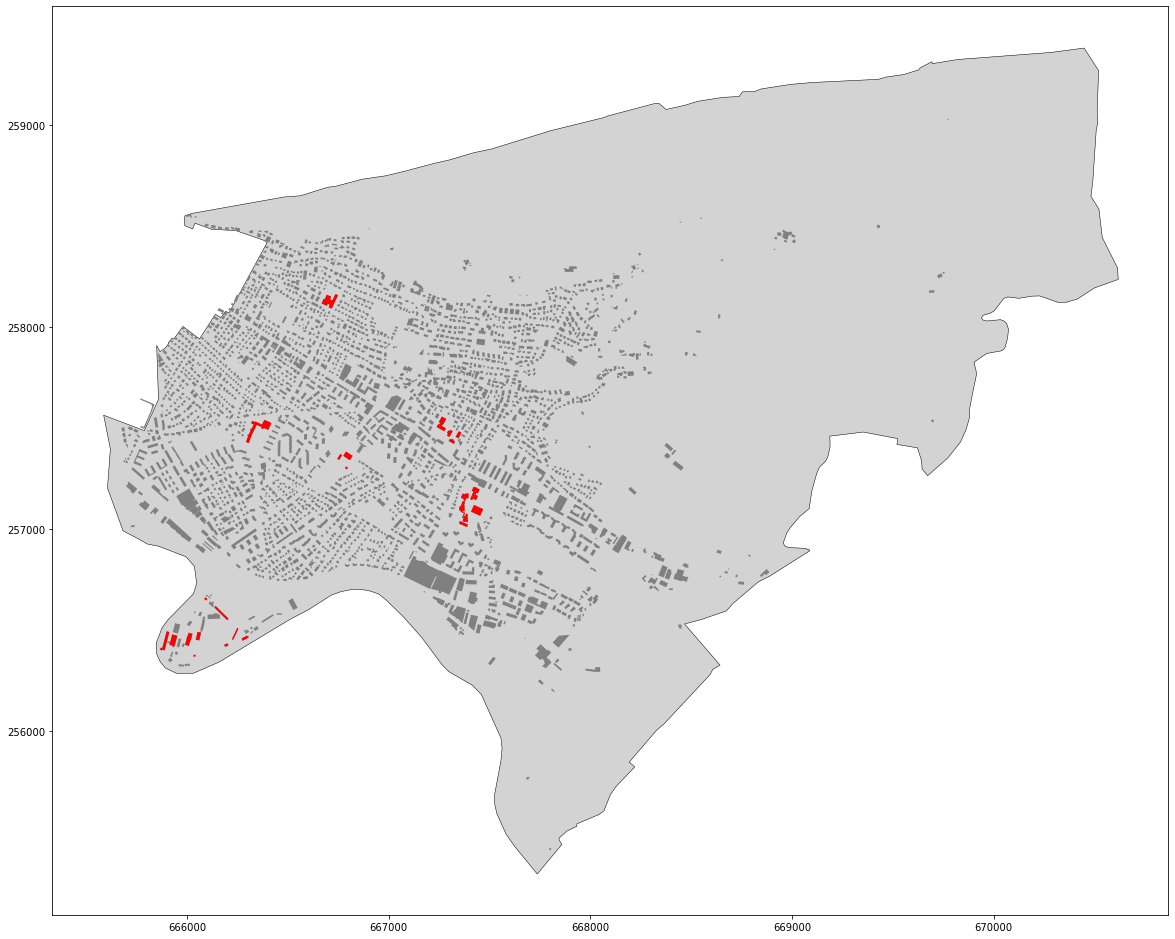

In [51]:
# Gemeindegrenze
ax = gdf_we.plot(linewidth=0.5, edgecolor='black', color='lightgrey', figsize=(20, 20))

# Alle Gebäude
gdf_bldg.plot(color='grey', ax=ax)

# Schulen
gdf_schools.plot(color='red', ax=ax)

### Räumliche Berechnungen

Sobald wir Daten als Geodataframe vorliegen haben, können wir allerlei Berechnungen durchführen.

#### Zum Beispiel:

Wie weit liegt ein bestimmtes Gebäude von der nächsten Bushaltestelle entfernt?

Um das zu beantworten, laden wir uns aus der OSM die Busstationen in Wettingen.

In [52]:
place = "Wettingen, Switzerland"
tags = {"highway": "bus_stop"}
gdf_stops = ox.geometries_from_place(place, tags=tags).to_crs(epsg=21781)

In [53]:
gdf_stops.shape

(53, 17)

In [54]:
gdf_stops.head()

bus  ele   highway           name  network operator  \
element_type osmid                                                            
node         247180593  yes  403  bus_stop          Sonne  A-Welle     RVBW   
             312311882  yes  388  bus_stop    Langenstein  A-Welle     RVBW   
             312311885  yes  392  bus_stop     Winkelried  A-Welle     RVBW   
             312311909  yes  388  bus_stop  Zentrumsplatz  A-Welle     RVBW   
             312311912  yes  394  bus_stop        Rathaus  A-Welle     RVBW   

                       public_transport                  uic_name  uic_ref  \
element_type osmid                                                           
node         247180593    stop_position          Wettingen, Sonne  8590306   
             312311882    stop_position    Wettingen, Langenstein  8590300   
             312311885    stop_position     Wettingen, Winkelried  8590312   
             312311909    stop_position  Wettingen, Zentrumsplatz  8578678   
             312311912    stop_position        Wettingen, Rathaus  8590302   

                                             geometry       old_name source  \
element_type osmid                                                            
node         247180593  POINT (667314.926 257341.834)            NaN    NaN   
             312311882  POINT (666290.379 258025.597)            NaN    NaN   
             312311885  POINT (666519.986 257882.935)            NaN    NaN   
             312311909  POINT (666872.689 257659.989)  Wettingen, EW    NaN   
             312311912  POINT (666847.157 257361.016)            NaN    NaN   

                       covered wheelchair shelter  bin bench  
element_type osmid                                            
node         247180593     NaN        NaN     NaN  NaN   NaN  
             312311882     NaN        NaN     NaN  NaN   NaN  
             312311885     NaN        NaN     NaN  NaN   NaN  
             312311909     NaN        NaN     NaN  NaN   NaN  
             312311912     NaN        NaN     NaN  NaN   NaN

Plot auf unserem Gemeindeplan mit den Gebäuden:

<AxesSubplot:>

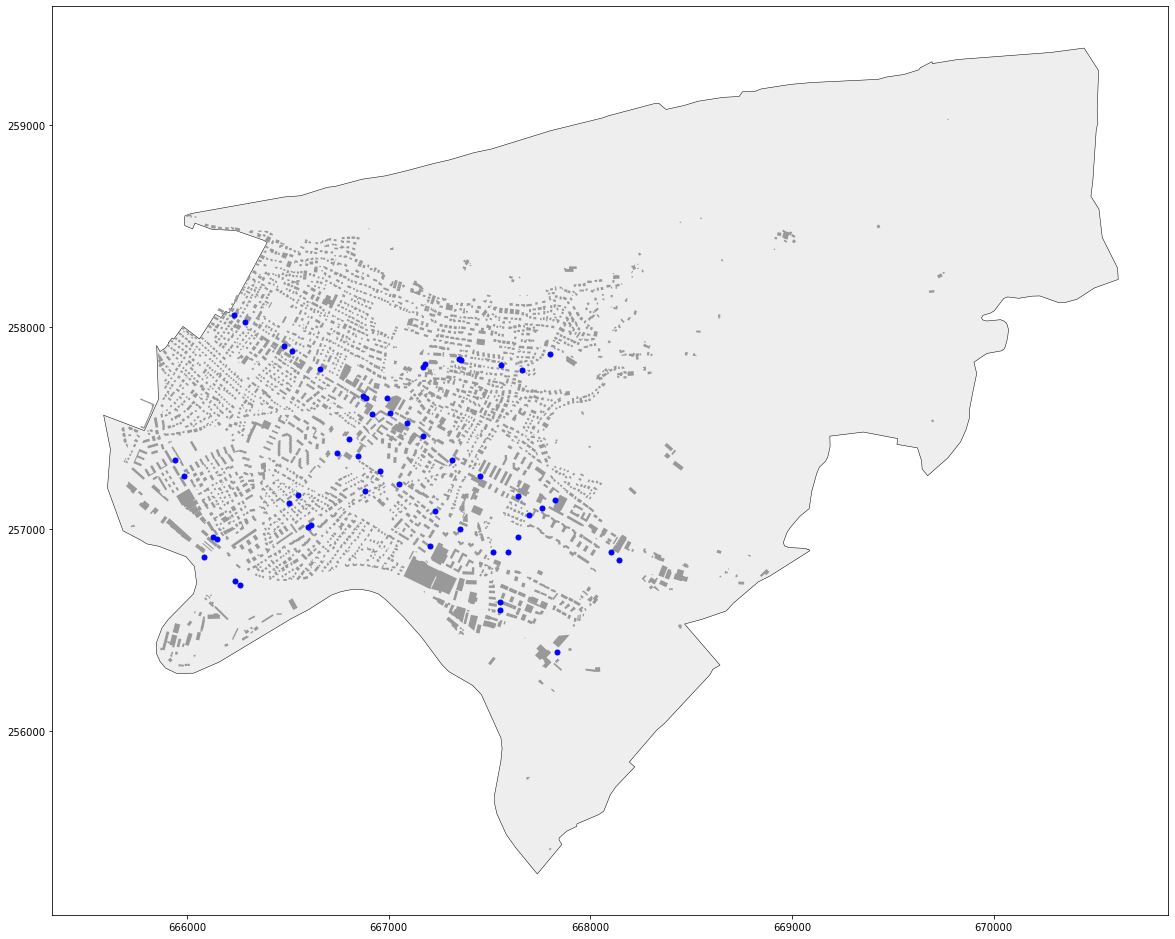

In [55]:
# Gemeindeumriss
ax = gdf_we.plot(linewidth=0.5, edgecolor='black', color='#EEEEEE', figsize=(20, 20))

# Gebäude
gdf_bldg.plot(color='#999999', ax=ax)

# Bushaltestellen
gdf_stops.plot(color='blue', markersize=25, ax=ax)

Wir können die Funktion `.distance()` nutzen, um die Distanz zwischen zwei Shapes zu berechnen.

Wenn wir diese Funktion auf ein ganzes Dataframe anwenden, erhalten eine Liste von Distanzen: von jedem Element im DF zur angegebenen Shape.

Hier zum Beispiel: die Distanzen sämtlicher Bushaltestellen zum ersten Eintrag im Gebäude-GDF:

In [56]:
gdf_stops.distance(gdf_bldg.iloc[0]['geometry']).head(10)

element_type  osmid    
node          247180593    1126.079809
              312311882     164.006548
              312311885     212.402276
              312311909     593.848884
              312311912     722.332939
              312311945    1342.689289
              312314204    1542.287321
              312314210    2104.696799
              312316108    1189.716452
              312316109     851.576233
dtype: float64

Wenn wir aus dieser Liste das Minimum auswählen, erhalten wir die Distanz von diesem Gebäude zur *nächsten* Bushaltestelle:

In [57]:
gdf_stops.distance(gdf_bldg.iloc[0]['geometry']).min()

164.00654788132496

Diese Berechnung führen wir nun mit sämtlichen Gebäuden durch. Dazu nutzen wir `apply()`.

Das Ergebnis speichern wir in einer neuen Spalte.

In [58]:
gdf_bldg['distance_next_stop'] = gdf_bldg['geometry'].apply(lambda bldg: gdf_stops.distance(bldg).min())

Die Distanzen sind folgendermassen verteilt:

<AxesSubplot:>

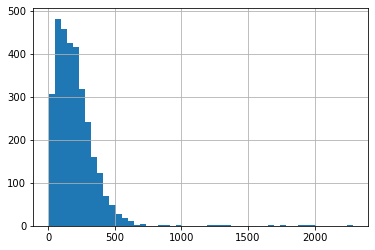

In [59]:
gdf_bldg['distance_next_stop'].hist(bins=50)

Wir können nun auf unserem Plot zB die Gebäude einfärben entsprechend der Distanz zur nächsten Bushaltestelle.

Das Limit für die Colormap setzen wir auf 500 Meter, damit man die Unterschiede gut erkennt.

Text(0.5, 1.0, 'Wettingen AG: Nähe zur Bushaltestelle')

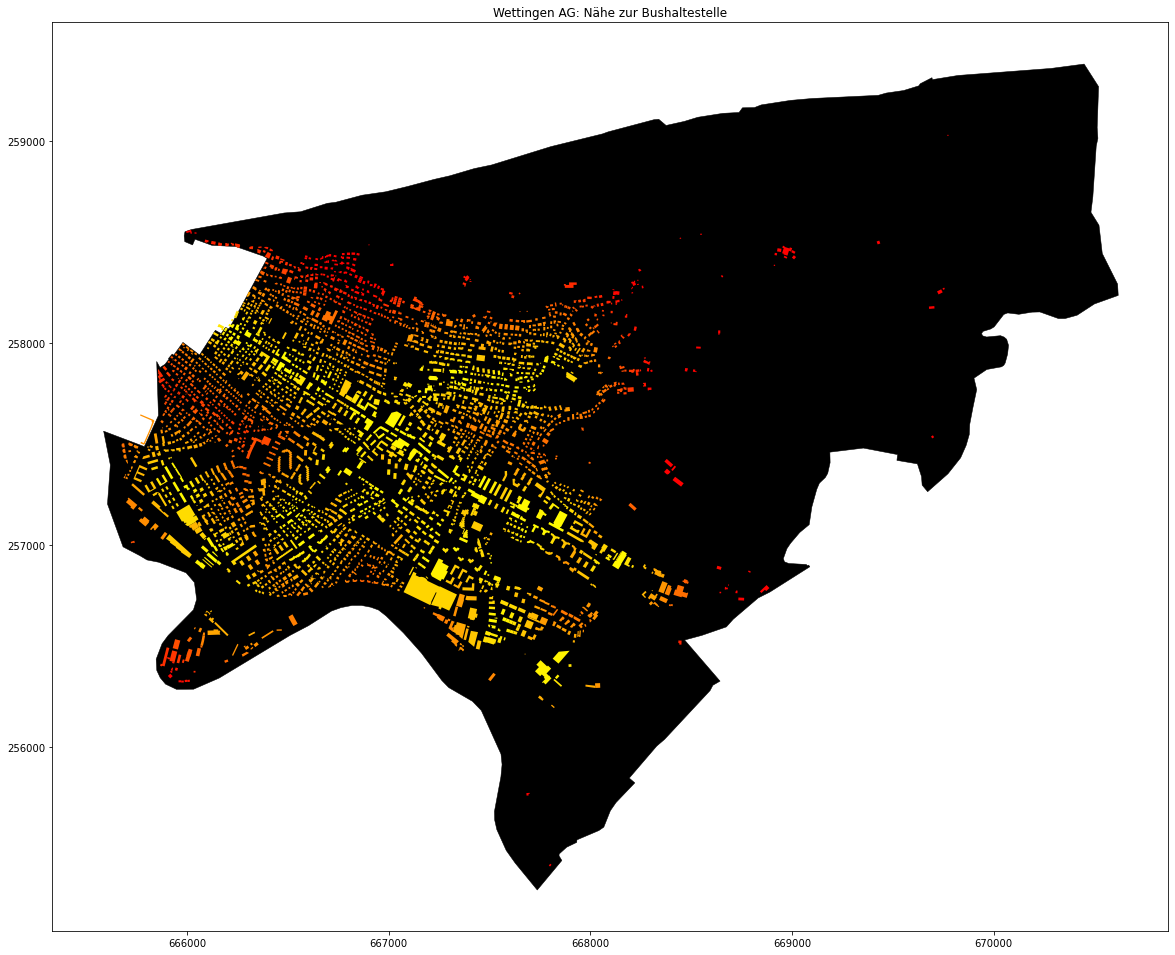

In [60]:
# Gemeindeumrisse
ax = gdf_we.plot(linewidth=0.5, edgecolor='black', color='#000000', figsize=(20, 20))

# Gebäude, eingefärbt entsprechend der Distanz
gdf_bldg.plot(ax=ax, column='distance_next_stop', cmap='autumn_r', vmin=0, vmax=500)

ax.set_title("Wettingen AG: Nähe zur Bushaltestelle")